In [1]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools
at.set_theme("dark")

# Create TREx RGB 3Hz 'burst' keogram

Keograms are a useful data product that can be generated from ASI image data. A keogram is created by stacking slices of the middle column (a N-S slice for the orientation of the UCalgary imagers) of pixels from ASI images over a period of time. 

Below, we'll work through the creation of a 5-minute keogram created from TREx RGB 3Hz burst data.

In [2]:
# Download 4 minute of TREx RGB Burst data. Burst data is extremely large.
# When working with burst data, it is best to load it in smaller chunks.
# The ability to read in burst data files will depend on your computer's
# resources, as large amounts of data will require more memory.

# For now, let's download 5 minutes of burst data. This is enough
# to make a keogram due to the high cadence.
dataset_name = "TREX_RGB_RAW_BURST"
start_dt = datetime.datetime(2023, 2, 24, 6, 0)
end_dt = datetime.datetime(2023, 2, 24, 6, 4)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid, n_parallel=4, overwrite=True)

In [3]:
# read in the data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=4)

In [4]:
# scale the images
images_scaled = at.scale_intensity(data.data, min=10, max=120)

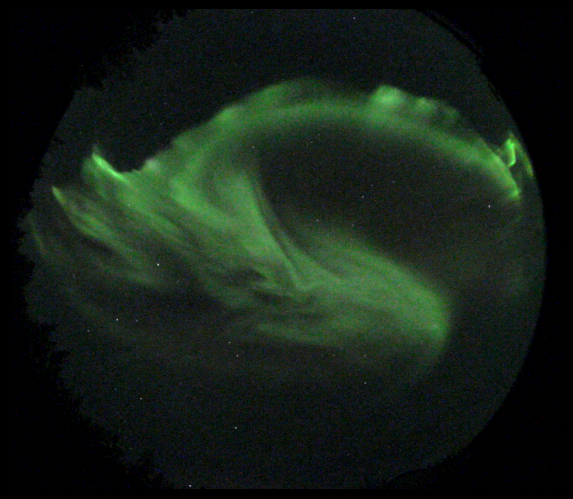

In [5]:
# show the first frame to evaluate our scaling
at.display(images_scaled[:, :, :, 0])

## Generate keogram

Now that we have our data how we want it, let's create a basic CCD-space keogram.

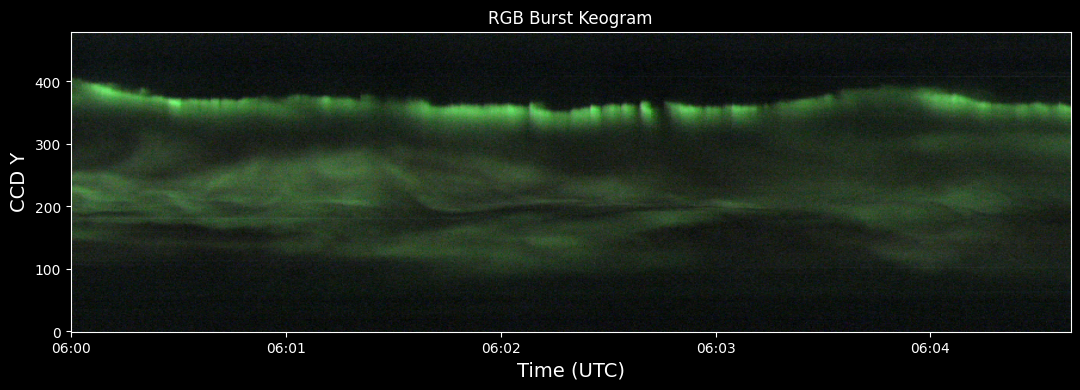

In [12]:
# create the keogram
keogram = at.keogram.create(images_scaled, data.timestamp)

# plot the keogram
keogram.plot(figsize=(10, 3), aspect="auto", ytick_increment=100, title="RGB Burst Keogram", xtick_increment=180)

## Reference in geographic coordinates

For each camera, the UCalgary maintains a geospatial calibration dataset that maps pixel coordinates (detector X and Y) to local observer and geodetic coordinates (at altitudes of interest). We refer to this calibration as a 'skymap'. The skymaps may change due to the freeze-thaw cycle and changes in the building, or when the instrument is serviced. A skymap is valid for a range of dates. The metadata contained in a file includes the start and end dates of the period of its validity.

Be sure you choose the correct skymap for your data timeframe. The `download_best_skymap()` function is there to help you, but for maximum flexibility you can download a range of skymap files and use whichever you prefer. All skymaps can be viewed by looking at the data tree for the imager you are using (see https://data.phys.ucalgary.ca/), or using the PyAuroraX `get_urls()` or `download()` functions. If you believe the geospatial calibration may be incorrect, please contact the UCalgary team.

For more on the skymap files, please see [the skymap file description document](https://data.phys.ucalgary.ca/sort_by_project/other/documentation/skymap_file_description.pdf).

In [13]:
# download skymap file
r = aurorax.data.ucalgary.download_best_skymap("TREX_RGB_SKYMAP_IDLSAV", site_uid, start_dt)
skymap_data = aurorax.data.ucalgary.read(r.dataset, r.filenames).data[0]

In [14]:
# set the geographic latitudes for the keogram
keogram.set_geographic_latitudes(skymap_data)

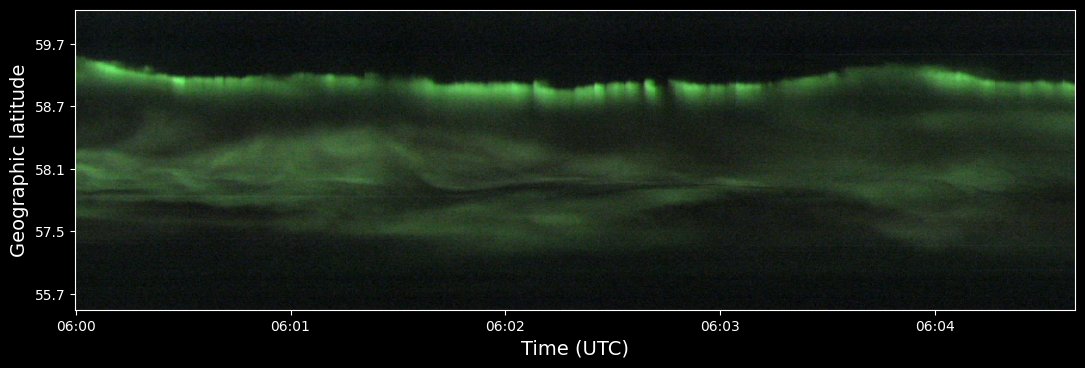

In [15]:
# plot the keogram
keogram.plot(figsize=(10, 3), aspect="auto", ytick_increment=100, y_type="geo", xtick_increment=180)

## Reference in magnetic coordinates

Leveraging AACGM, we can also display the keogram using magnetic latitudes.

In [16]:
# set the magnetic latitudes for the keogram
keogram.set_magnetic_latitudes(skymap_data, start_dt)

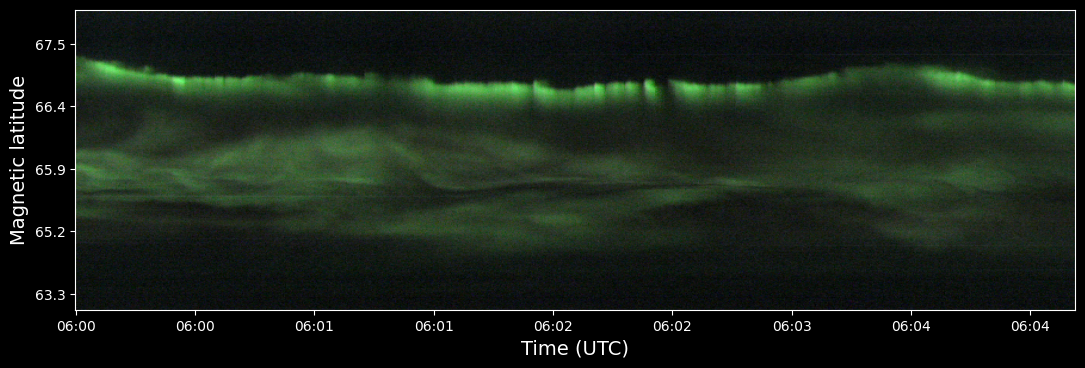

In [17]:
# plot the keogram
keogram.plot(figsize=(10, 3), aspect="auto", ytick_increment=100, y_type="mag")